In [79]:
import os
from scipy import ndimage, misc
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SequentialFeatureSelector as SFS



In [82]:
data = pd.read_csv('movieData.csv')
headers = data.head()

headers = list(data.columns)
for i in (2, 3, 4, 5, 6, 8, 9, 10, 11, 12) :
    print(headers[i])

#Prepare Average Vote
dataArray = data.values
array = np.zeros((dataArray.shape[0], dataArray.shape[1]-2))
print(np.shape(array))
X = dataArray[:,(2, 3, 4, 5, 6, 8, 9, 10, 11)]
X = X.astype('double')
Y = dataArray[:,7]
Y = Y.astype('int')

"""
# Reverse Feature Selection with Logistic Regression
model = LogisticRegression()
rfe = RFE(model, 1, verbose = 1)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
"""

# Recursive Feature Elimination with Ridge Regression
model = Ridge(normalize=True)
rfe = RFE(model, n_features_to_select = 1, verbose = 1)
fit = rfe.fit(X, Y)
#print("Num Features: %s" % (fit.n_features_))
#print("Selected Features: %s" % (fit.support_))
#print("Feature Ranking: %s" % (fit.ranking_))


sfs_forward = SFS(model.fit(X,Y), n_features_to_select=4, direction="forward").fit(X, y)
scores = sfs_forward
print(scores)
feature_names = np.array(data.columns)
feature_names = feature_names[np.array([2, 3, 4, 5, 6, 8, 9, 10, 11])]
print(feature_names)
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)







year
genre
duration
country
language
votes
budget
usa_gross_income
worlwide_gross_income
metascore
(6083, 13)
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
None
['year' 'genre' 'duration' 'country' 'language' 'votes' 'budget'
 'usa_gross_income' 'worlwide_gross_income']
Features selected by forward sequential selection: ['duration' 'votes' 'budget' 'usa_gross_income']


In [105]:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,4)


Index(['title', 'original_title', 'year', 'genre', 'duration', 'country',
       'language', 'avg_vote', 'votes', 'budget', 'usa_gross_income',
       'worlwide_gross_income', 'metascore', 'reviews_from_users',
       'reviews_from_critics'],
      dtype='object')


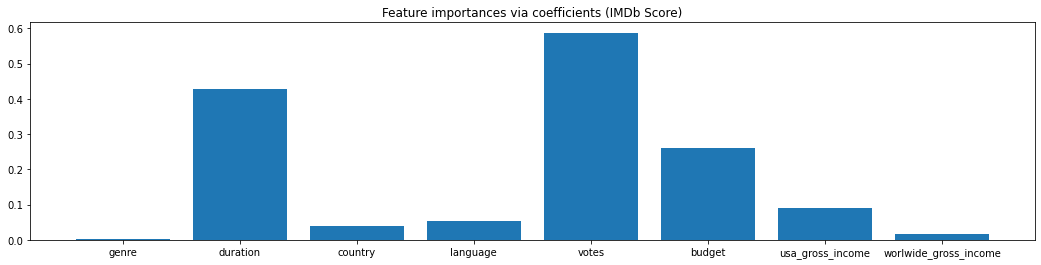

Features selected by SelectFromModel: ['duration' 'votes' 'budget']


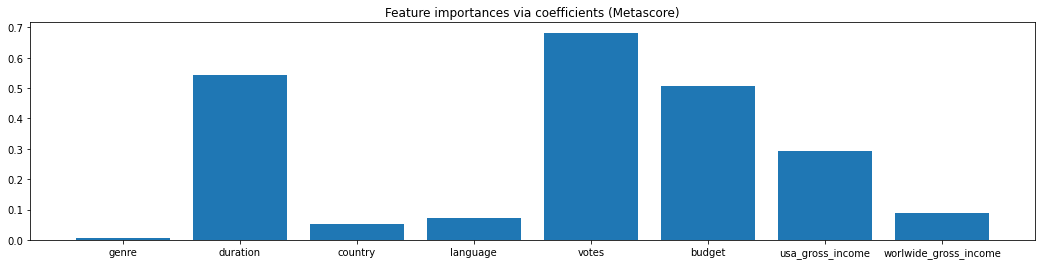

Features selected by SelectFromModel: ['duration' 'votes' 'budget']
Features selected by forward sequential selection: ['duration' 'votes' 'budget']
Features selected by backward sequential selection: ['duration' 'votes' 'budget']


In [137]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel as SFM
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#Initialize Data

data = pd.read_csv('movieData.csv')
print(data.columns)
dataArray = data.values
#print(np.shape(array))
X = dataArray[:,(3, 4, 5, 6, 8, 9, 10, 11)]
X = X.astype('double') / X.max(axis=0)
Y1 = dataArray[:,7]
Y1 = Y1.astype('double') / Y1.max(axis=0)
Y2 = dataArray[:,12]
Y2 = Y2.astype('double') / Y2.max(axis=0)

#LassoCV Fit
lasso = LassoCV().fit(X, Y1)
importance = np.abs(lasso.coef_)
feature_names = np.array(headers)[np.array([3, 4, 5, 6, 8, 9, 10, 11])]

plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients (IMDb Score)")
plt.show()

thresh = np.sort(importance)[-4] + 0.01

sfm = SFM(lasso, threshold=thresh).fit(X, Y1)
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")

#LassoCV Fit
lasso = LassoCV().fit(X, Y2)
importance = np.abs(lasso.coef_)
feature_names = np.array(headers)[np.array([3, 4, 5, 6, 8, 9, 10, 11])]

plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients (Metascore)")
plt.show()

thresh = np.sort(importance)[-4] + 0.01

sfm = SFM(lasso, threshold=thresh).fit(X, Y2)
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")


sfs_forward = SFS(lasso, n_features_to_select=3, direction="forward").fit(X, Y)

sfs_backward = SFS(lasso, n_features_to_select=3, direction="backward").fit(X, Y)

print("Features selected by forward sequential selection: " f"{feature_names[sfs_forward.get_support()]}")

print("Features selected by backward sequential selection: " f"{feature_names[sfs_backward.get_support()]}")





(6083, 13)
['genre' 'duration' 'country' 'language' 'votes' 'budget'
 'usa_gross_income' 'worlwide_gross_income']


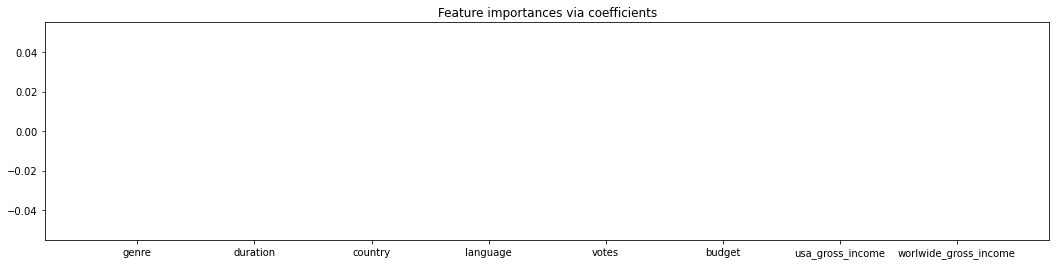

(100, 8)
(100, 2)


In [121]:
# Doesn't Work

data = pd.read_csv('movieData.csv')
headers = data.columns
#print(headers)



dataArray = data.values
array = np.zeros((dataArray.shape[0], dataArray.shape[1]-2))
print(np.shape(array))
X = dataArray[:,(3, 4, 5, 6, 8, 9, 10, 11)]
X = X.astype('double')
Y = dataArray[:,7]
Y = Y.astype('double')

lasso = Lasso().fit(X, Y)
importance = np.abs(lasso.coef_)
feature_names = np.array(headers)[np.array([3, 4, 5, 6, 8, 9, 10, 11])]
print(feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

x = sfs_forward.transform(X)
print(np.shape(X))
print(np.shape(x))


